<h1>Data Collection</h1>

In [406]:
# Data manipulation and analysis libraries
import pandas as pd                
import numpy as np                 

# Data visualization libraries
import seaborn as sns              
import matplotlib.pyplot as plt    # 

# Ignore warning messages to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Preprocessing utilities
from sklearn.preprocessing import LabelEncoder   
from sklearn.model_selection import train_test_split  

# Machine learning classification models
from sklearn.tree import DecisionTreeClassifier       
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.ensemble import RandomForestClassifier   
from xgboost import XGBClassifier                     

# Hyperparameter tuning techniques
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import GridSearchCV        

# Evaluation metrics and performance analysis
from sklearn import metrics                              
from sklearn.metrics import accuracy_score              
from sklearn.metrics import auc                         
from sklearn.metrics import confusion_matrix             
from sklearn.metrics import roc_auc_score                
from sklearn.metrics import roc_curve                   
from sklearn.metrics import recall_score                

# Additional evaluation metrics
from sklearn.metrics import classification_report        
from sklearn.metrics import cohen_kappa_score           
from sklearn.metrics import f1_score                     


In [408]:
#Reading the Fish Health dataset from a CSV file using latin-1 encoding
df = pd.read_csv("Fish_Health_Database.csv", encoding='latin-1')


In [416]:
#Loading Dataset
df

,CASE,START DATE (yyyy-mm-dd),LOCATION NAME,LATITUDE (Decimal Degrees),LONGITUDE (Decimal Degrees),SPECIES NAME,LIFE STAGE DESCRIPTION,ETIOLOGICAL DESCRIPTION
0,CAS,DATE DE DÉBUT (aaaa-mm-jj),NOM DU LIEU,LATITUDE (Degrés Décimaux),LONGITUDE (Degrés Décimaux),NOM DE L'ESPÈCE,DESCRIPTION DU STADE BIOLOGIQUE,DESCRIPTION ÉTIOLOGIQUE
1,980261,NaN,NADINA RIVER,54.000859,-126.532768,SOCKEYE SALMON,SPENT ADULT,DERMOCYSTIDIUM
2,980261,NaN,NADINA RIVER,54.000859,-126.532768,SOCKEYE SALMON,SPENT ADULT,ICHTHYOPHTHIRIUS SP.
3,980258,NaN,FULTON RIVER HATCHERY,54.853338,-126.475918,SOCKEYE SALMON,FRY (0 - 4 MONTHS),PARASITES NOT DETECTED
4,580002,1958-12-04,FORT BABINE HATCHERY,55.044622,-126.312091,CHINOOK SALMON,YEARLING,CYATHOCEPHALUS
...,...,...,...,...,...,...,...,...
7051,20170048,2017-04-26,ROBERTSON CK. & HATCHERY,49.316215,-124.996305,STEELHEAD,2 YR,AEROMONAS HYDROPHILA
7052,20170048,2017-04-26,ROBERTSON CK. & HATCHERY,49.316215,-124.996305,STEELHEAD,2 YR,EPISTYLIS
7053,20170048,2017-04-26,ROBERTSON CK. & HATCHERY,49.316215,-124.996305,STEELHEAD,2 YR,TRICHOPHRYA
7054,20170048,2017-04-26,ROBERTSON CK. & HATCHERY,49.316215,-124.996305,STEELHEAD,2 YR,TRICHOPHRYA


In [410]:
# Loading  the 'ETIOLOGICAL DESCRIPTION /' column from the dataset
df['ETIOLOGICAL DESCRIPTION /']


0          DESCRIPTION ÉTIOLOGIQUE
1                   DERMOCYSTIDIUM
2             ICHTHYOPHTHIRIUS SP.
3           PARASITES NOT DETECTED
4                   CYATHOCEPHALUS
                   ...            
7051          AEROMONAS HYDROPHILA
7052                     EPISTYLIS
7053                   TRICHOPHRYA
7054                   TRICHOPHRYA
7055    RENIBACTERIUM SALMONINARUM
Name: ETIOLOGICAL DESCRIPTION /, Length: 7056, dtype: object

In [412]:
# Cleaning column names by removing '/' characters and extra spaces
df.columns = df.columns.str.replace('/', '').str.strip()
# Showing the cleaned column names
print(df.columns)

Index(['CASE', 'START DATE (yyyy-mm-dd)', 'LOCATION NAME',
       'LATITUDE (Decimal Degrees)', 'LONGITUDE (Decimal Degrees)',
       'SPECIES NAME', 'LIFE STAGE DESCRIPTION', 'ETIOLOGICAL DESCRIPTION'],
      dtype='object')


In [330]:
df.shape
#There are 7056 rows x 8 Columns

(7056, 8)

In [332]:
# Checking the number of missing (null) values in each column of the dataset
df.isnull().sum()


CASE                             0
START DATE (yyyy-mm-dd)          3
LOCATION NAME                    0
LATITUDE (Decimal Degrees)     418
LONGITUDE (Decimal Degrees)    418
SPECIES NAME                     0
LIFE STAGE DESCRIPTION           0
ETIOLOGICAL DESCRIPTION          0
dtype: int64

In [334]:
# Checking The information of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CASE                         7056 non-null   object
 1   START DATE (yyyy-mm-dd)      7053 non-null   object
 2   LOCATION NAME                7056 non-null   object
 3   LATITUDE (Decimal Degrees)   6638 non-null   object
 4   LONGITUDE (Decimal Degrees)  6638 non-null   object
 5   SPECIES NAME                 7056 non-null   object
 6   LIFE STAGE DESCRIPTION       7056 non-null   object
 7   ETIOLOGICAL DESCRIPTION      7056 non-null   object
dtypes: object(8)
memory usage: 441.1+ KB


In [336]:
# Remove all rows that contain any missing (null) values
df_cleaned_rows = df.dropna()
print(df_cleaned_rows)

          CASE     START DATE (yyyy-mm-dd)             LOCATION NAME  \
0          CAS  DATE DE DÉBUT (aaaa-mm-jj)               NOM DU LIEU   
4       580002                  1958-12-04      FORT BABINE HATCHERY   
6       700085                  1970-08-14  ROSEWALL CREEK HATCHERY    
7       700085                  1970-08-14  ROSEWALL CREEK HATCHERY    
8       700085                  1970-08-14  ROSEWALL CREEK HATCHERY    
...        ...                         ...                       ...   
7051  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7052  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7053  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7054  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7055  20170053                  2017-05-03  PUNTLEDGE RIVER HATCHERY   

      LATITUDE (Decimal Degrees)  LONGITUDE (Decimal Degrees)  \
0     LATITUDE (Degrés Décimaux)  LONGITUDE (Degrés Décimaux)   
4    

In [338]:
# Re-check the number of missing (null) values in each column after data cleaning
df.isnull().sum()

CASE                             0
START DATE (yyyy-mm-dd)          3
LOCATION NAME                    0
LATITUDE (Decimal Degrees)     418
LONGITUDE (Decimal Degrees)    418
SPECIES NAME                     0
LIFE STAGE DESCRIPTION           0
ETIOLOGICAL DESCRIPTION          0
dtype: int64

In [340]:
# Dataset by removing rows with missing values
df_cleaned = df.dropna()
print(df_cleaned)

          CASE     START DATE (yyyy-mm-dd)             LOCATION NAME  \
0          CAS  DATE DE DÉBUT (aaaa-mm-jj)               NOM DU LIEU   
4       580002                  1958-12-04      FORT BABINE HATCHERY   
6       700085                  1970-08-14  ROSEWALL CREEK HATCHERY    
7       700085                  1970-08-14  ROSEWALL CREEK HATCHERY    
8       700085                  1970-08-14  ROSEWALL CREEK HATCHERY    
...        ...                         ...                       ...   
7051  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7052  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7053  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7054  20170048                  2017-04-26  ROBERTSON CK. & HATCHERY   
7055  20170053                  2017-05-03  PUNTLEDGE RIVER HATCHERY   

      LATITUDE (Decimal Degrees)  LONGITUDE (Decimal Degrees)  \
0     LATITUDE (Degrés Décimaux)  LONGITUDE (Degrés Décimaux)   
4    

In [342]:
#There are no null values in the dataset
print(df_cleaned.isnull().sum())


CASE                           0
START DATE (yyyy-mm-dd)        0
LOCATION NAME                  0
LATITUDE (Decimal Degrees)     0
LONGITUDE (Decimal Degrees)    0
SPECIES NAME                   0
LIFE STAGE DESCRIPTION         0
ETIOLOGICAL DESCRIPTION        0
dtype: int64


In [344]:
#Counting Unique Values
df['ETIOLOGICAL DESCRIPTION'].value_counts()


ETIOLOGICAL DESCRIPTION
RENIBACTERIUM SALMONINARUM    1380
MYXOBACTERIOSIS                917
AEROMONAS SALMONICIDA          598
FUNGAL INFECTION               552
BACTERIAL GILL DISEASE         452
                              ... 
OTHER PROTOZOAN                  1
TRYPANOSOMA SP.                  1
CYATHOCEPHALUS                   1
PARASITES NOT DETECTED           1
ERGASILUS SP.                    1
Name: count, Length: 122, dtype: int64

In [346]:
#The describe function will display all the decriptive statistics of the data including count, unique, top freq
df.describe()


,CASE,START DATE (yyyy-mm-dd),LOCATION NAME,LATITUDE (Decimal Degrees),LONGITUDE (Decimal Degrees),SPECIES NAME,LIFE STAGE DESCRIPTION,ETIOLOGICAL DESCRIPTION
count,7056,7053,7056,6638,6638,7056,7056,7056
unique,4218,2981,248,169,169,23,22,122
top,20150115,2015-09-18,PUNTLEDGE RIVER HATCHERY,49.687476,-125.053097,COHO SALMON,FRY (0 - 4 MONTHS),RENIBACTERIUM SALMONINARUM
freq,19,19,589,589,589,3701,2359,1380


In [348]:
# The nunique() function is used to count distinct property over requested axis.
df.nunique()


CASE                           4218
START DATE (yyyy-mm-dd)        2981
LOCATION NAME                   248
LATITUDE (Decimal Degrees)      169
LONGITUDE (Decimal Degrees)     169
SPECIES NAME                     23
LIFE STAGE DESCRIPTION           22
ETIOLOGICAL DESCRIPTION         122
dtype: int64

In [350]:
# Displaying the column names of the dataset
df.columns


Index(['CASE', 'START DATE (yyyy-mm-dd)', 'LOCATION NAME',
       'LATITUDE (Decimal Degrees)', 'LONGITUDE (Decimal Degrees)',
       'SPECIES NAME', 'LIFE STAGE DESCRIPTION', 'ETIOLOGICAL DESCRIPTION'],
      dtype='object')

In [352]:
# Convert latitude, longitude values to numeric format and invalid entries are set to NaN
df['LATITUDE (Decimal Degrees)'] = pd.to_numeric(df['LATITUDE (Decimal Degrees)'], errors='coerce')
df['LONGITUDE (Decimal Degrees)'] = pd.to_numeric(df['LONGITUDE (Decimal Degrees)'], errors='coerce')
# Convert the start date column to datetime format
df['START DATE (yyyy-mm-dd)'] = pd.to_datetime(df['START DATE (yyyy-mm-dd)'], errors='coerce')

# Check data types now
print(df.dtypes)


CASE                                   object
START DATE (yyyy-mm-dd)        datetime64[ns]
LOCATION NAME                          object
LATITUDE (Decimal Degrees)            float64
LONGITUDE (Decimal Degrees)           float64
SPECIES NAME                           object
LIFE STAGE DESCRIPTION                 object
ETIOLOGICAL DESCRIPTION                object
dtype: object


<h1> Data Visualization</h1>

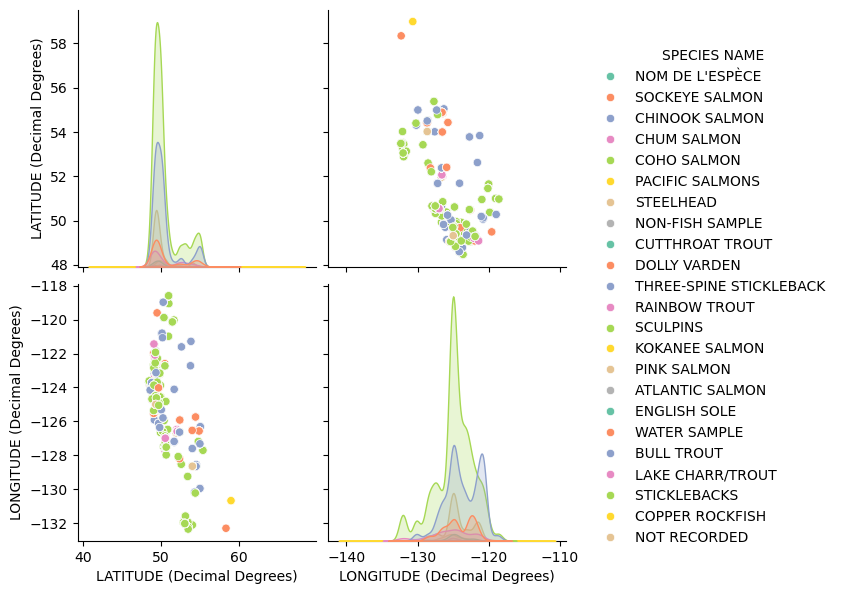

In [354]:
# Select relevant columns for visualization
plot_data = df[['LATITUDE (Decimal Degrees)', 
                'LONGITUDE (Decimal Degrees)', 
                'SPECIES NAME']]

# Create pairplot colored by species
sns.pairplot(plot_data, hue='SPECIES NAME', palette='Set2', height=3)
plt.show()

In [356]:
#Displaying columns names
df. columns


Index(['CASE', 'START DATE (yyyy-mm-dd)', 'LOCATION NAME',
       'LATITUDE (Decimal Degrees)', 'LONGITUDE (Decimal Degrees)',
       'SPECIES NAME', 'LIFE STAGE DESCRIPTION', 'ETIOLOGICAL DESCRIPTION'],
      dtype='object')

<H1> Data Exploration </H1>

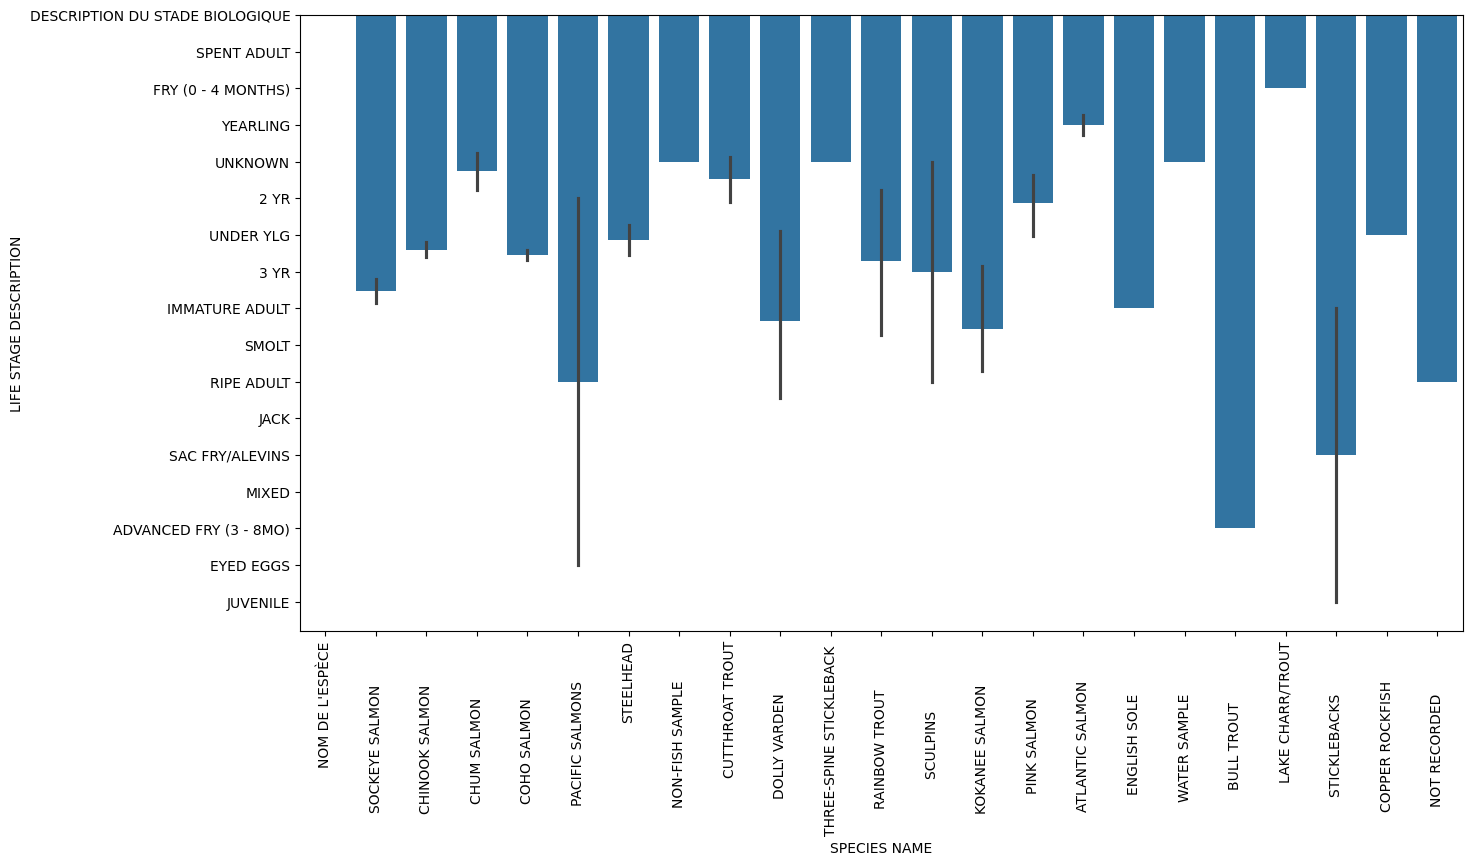

In [358]:
#Visualizing barplot where species name in x axis and list stage description in y axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x= 'SPECIES NAME', y= 'LIFE STAGE DESCRIPTION', data=df);


In [360]:
# Identify the top 10 combinations of fish species and etiological causes
top_10_species_etiology = (
    df
    .groupby(['SPECIES NAME', 'ETIOLOGICAL DESCRIPTION'])
    .size()
    .reset_index(name='Total Cases')
    .sort_values(by='Total Cases', ascending=False)
    .head(10)
)


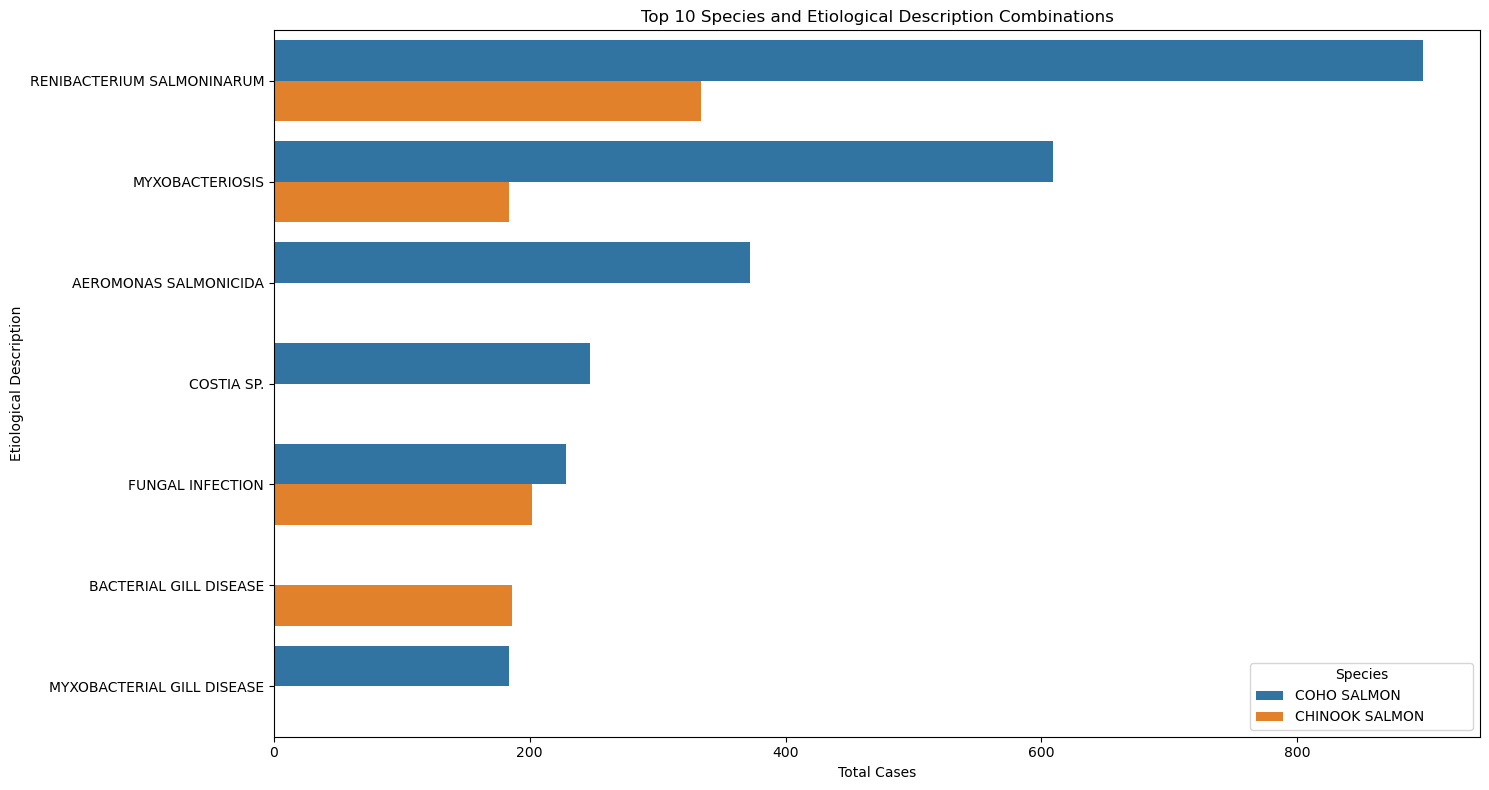

In [362]:
# Set the figure size for better readability
plt.figure(figsize=(15, 8))

# Create a bar plot showing total disease cases
sns.barplot(
    x='Total Cases',
    y='ETIOLOGICAL DESCRIPTION',
    hue='SPECIES NAME',
    data=top_10_species_etiology
)

plt.title('Top 10 Species and Etiological Description Combinations')
plt.xlabel('Total Cases')
plt.ylabel('Etiological Description')
plt.legend(title='Species')
plt.tight_layout()
plt.show()


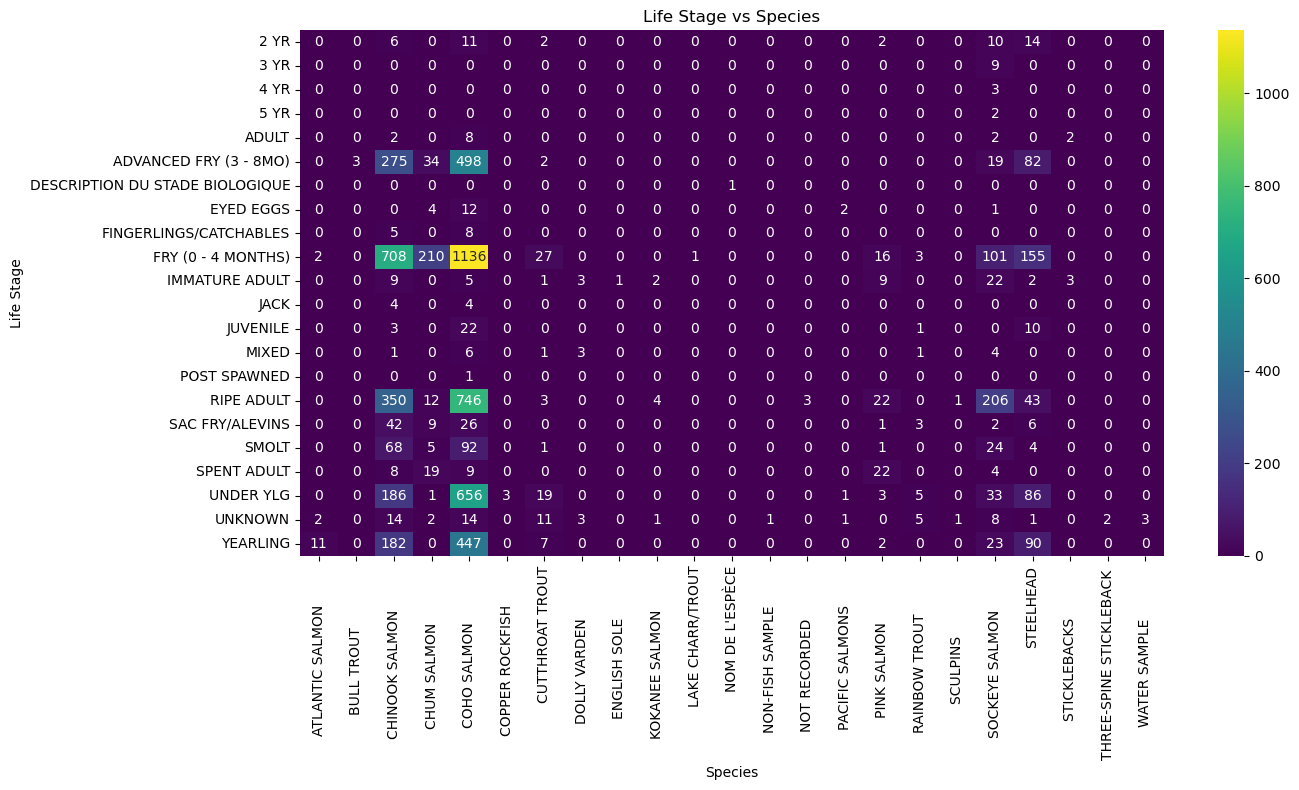

In [364]:
# Create a pivot table to analyze the relationship between life stage and species
pivot = df.pivot_table(
    index='LIFE STAGE DESCRIPTION',
    columns='SPECIES NAME',
    values='ETIOLOGICAL DESCRIPTION',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='viridis', annot=True, fmt='.4g')
plt.title('Life Stage vs Species')
plt.xlabel('Species')
plt.ylabel('Life Stage')
plt.tight_layout()
plt.show()


<h1>Label Encoding</h1>

In [366]:
# Define categorical columns exactly as in DataFrame
cat_cols = ['SPECIES NAME', 'LIFE STAGE DESCRIPTION', 'LOCATION NAME']

# Create a new LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Verify new data types
print(df.dtypes)


CASE                                   object
START DATE (yyyy-mm-dd)        datetime64[ns]
LOCATION NAME                           int32
LATITUDE (Decimal Degrees)            float64
LONGITUDE (Decimal Degrees)           float64
SPECIES NAME                            int32
LIFE STAGE DESCRIPTION                  int32
ETIOLOGICAL DESCRIPTION                object
dtype: object


In [368]:
# Display all column names (keys) present in the dataset
df.keys()

Index(['CASE', 'START DATE (yyyy-mm-dd)', 'LOCATION NAME',
       'LATITUDE (Decimal Degrees)', 'LONGITUDE (Decimal Degrees)',
       'SPECIES NAME', 'LIFE STAGE DESCRIPTION', 'ETIOLOGICAL DESCRIPTION'],
      dtype='object')

<h1> Feature Engineeriung </h1>

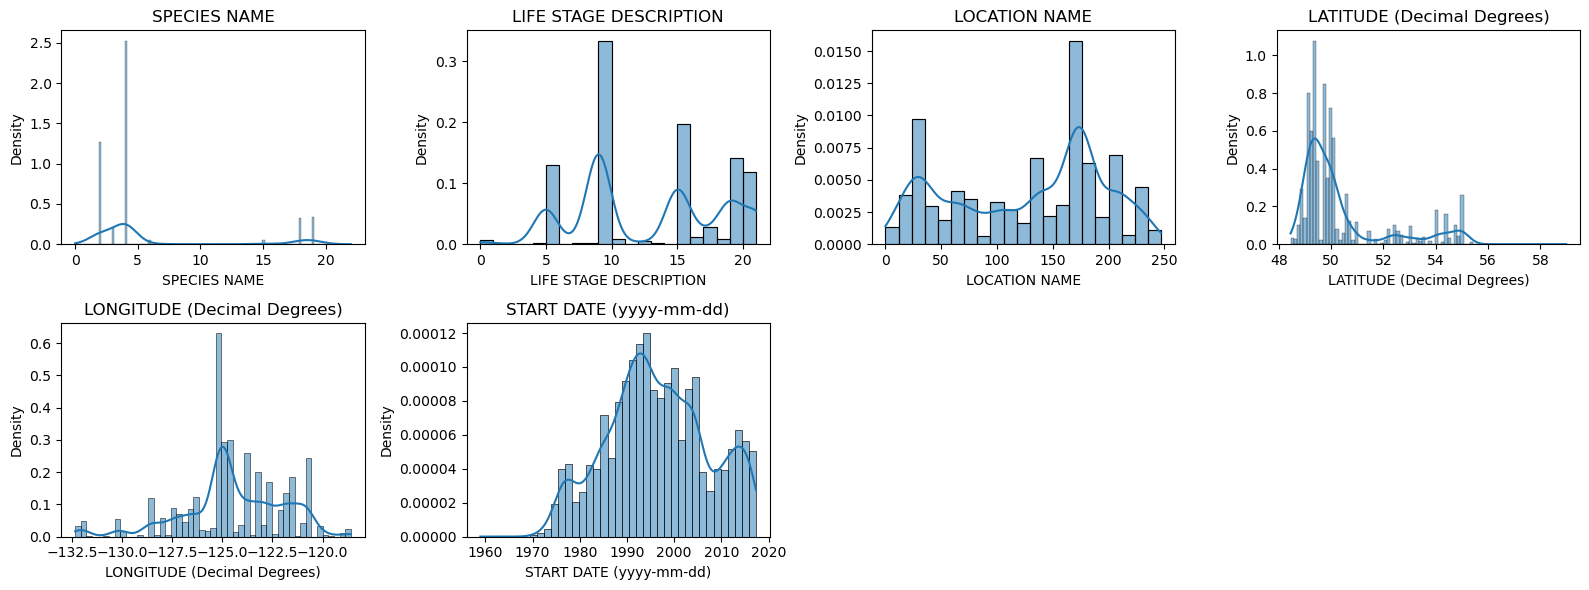

In [370]:
# Select columns to visualize their distributions
plot_cols = [
    'SPECIES NAME',
    'LIFE STAGE DESCRIPTION',
    'LOCATION NAME',
    'LATITUDE (Decimal Degrees)',
    'LONGITUDE (Decimal Degrees)',
    'START DATE (yyyy-mm-dd)',
    
]

# Define subplot grid size
rows = 2
cols = 4

# Create a figure with multiple subplots
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 6))

# Flatten axes array for easy iteration
ax = ax.flatten()

# Plot histograms for each selected column
for i, col in enumerate(plot_cols[:rows*cols]):
    sns.histplot(df[col], kde=True, stat='density', ax=ax[i])
    ax[i].set_title(col)

# Turn off empty plots (if any)
for j in range(i + 1, rows*cols):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

<h1>Data Training</h1>

In [372]:
# Convert latitude values to numeric format
df['LATITUDE (Decimal Degrees)']  = pd.to_numeric(df['LATITUDE (Decimal Degrees)'], errors='coerce')
# Convert longitude values to numeric format
df['LONGITUDE (Decimal Degrees)'] = pd.to_numeric(df['LONGITUDE (Decimal Degrees)'], errors='coerce')

# Replace missing latitude values with the median latitude
df['LATITUDE (Decimal Degrees)']  = df['LATITUDE (Decimal Degrees)'].fillna(df['LATITUDE (Decimal Degrees)'].median())
# Replace missing longitude values with the median longitude
df['LONGITUDE (Decimal Degrees)'] = df['LONGITUDE (Decimal Degrees)'].fillna(df['LONGITUDE (Decimal Degrees)'].median())


In [374]:
# Define a function to simplify detailed etiological descriptions
def simplify_label(x):
    x = str(x).lower()
    if "bacter" in x:
        return "Bacterial"
    elif "virus" in x:
        return "Viral"
    elif "parasite" in x or "protozo" in x:
        return "Parasitic"
    elif "fung" in x:
        return "Fungal"
    else:
        return "Other"
# Apply the function to create a new target column
df["Target"] = df["ETIOLOGICAL DESCRIPTION"].apply(simplify_label)


In [376]:
# Separate the feature set by removing non-predictive and target-related columns
X = df.drop(columns=[
    'CASE',
    'ETIOLOGICAL DESCRIPTION',
    'START DATE (yyyy-mm-dd)',
    'Target'
])

# Define the target variable
y = df['Target']

In [378]:
# Encode all categorical (object-type) feature columns into numeric values
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
# Encode the target labels into numeric form
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Store original class names for later interpretation of results
class_names = le_target.classes_

# Split the dataset into training and testing sets
# 80% for training and 20% for testing, while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display the shapes of the training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(class_names)

# View the first few rows of the training feature set
X_train.head()



(5644, 5)
(1412, 5)
(5644,)
(1412,)
['Bacterial' 'Fungal' 'Other' 'Parasitic']


,LOCATION NAME,LATITUDE (Decimal Degrees),LONGITUDE (Decimal Degrees),SPECIES NAME,LIFE STAGE DESCRIPTION
1296,168,49.687476,-125.053097,4,19
5582,172,50.660671,-127.519501,4,19
900,67,54.853338,-126.475918,18,9
3522,168,49.687476,-125.053097,2,5
6000,33,49.105735,-121.457964,19,9


<h1> Model Evaluation</h1>

<h1> Decision Tree Classifier </h1>

In [380]:
# Display the data types of all feature columns
X.dtypes


LOCATION NAME                    int32
LATITUDE (Decimal Degrees)     float64
LONGITUDE (Decimal Degrees)    float64
SPECIES NAME                     int32
LIFE STAGE DESCRIPTION           int32
dtype: object

In [384]:
# Fit the Decision Tree model on training data
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Predict on training data
train_preds3 = DT.predict(X_train)

# Accuracy on training data
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds3))

# Predict on test data
test_preds3 = DT.predict(X_test)

# Accuracy on test data
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds3))
print("-" * 50)

# ROC AUC for MULTICLASS (must use probabilities, not predicted labels)
train_proba = DT.predict_proba(X_train)
test_proba  = DT.predict_proba(X_test)

print("ROC score on train is: ", roc_auc_score(y_train, train_proba, multi_class='ovr', average='weighted'))
print("ROC score on test is: ", roc_auc_score(y_test,  test_proba,  multi_class='ovr', average='weighted'))
print("-" * 50)

# Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds3))
print("wrong predictions out of total")
print("-" * 50)

# Wrong predictions count
print((y_test != test_preds3).sum(), "/",
      ((y_test == test_preds3).sum() + (y_test != test_preds3).sum()))
print("-" * 50)

# Cohen Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(y_test, test_preds3))


Model accuracy on train is:  0.6987951807228916
Model accuracy on test is:  0.6083569405099151
--------------------------------------------------
ROC score on train is:  0.8365468555873226
ROC score on test is:  0.6953273656265763
--------------------------------------------------
confusion_matrix train is:  [[2415   18  511    0]
 [ 292   62  107    0]
 [ 718   25 1465    0]
 [  16    0   13    2]]
confusion_matrix test is:  [[535  14 187   0]
 [ 71   5  39   0]
 [220  14 319   0]
 [  2   1   5   0]]
wrong predictions out of total
--------------------------------------------------
553 / 1412
--------------------------------------------------
KappaScore is:  0.2745020793922748


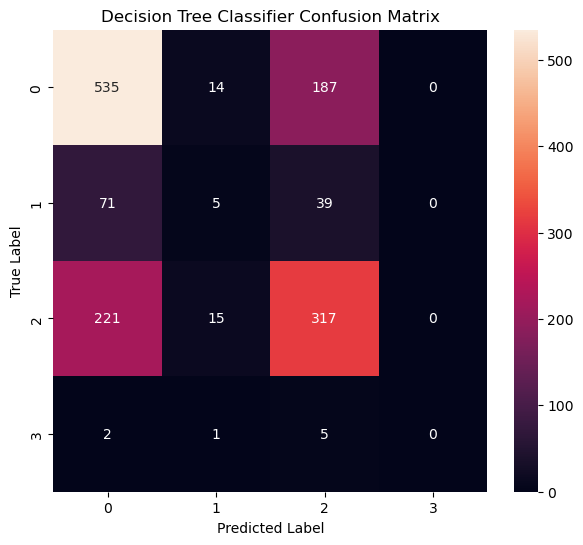

In [386]:
# Generate the confusion matrix using true labels and predicted labels
cm = confusion_matrix(y_test, test_preds)

# Plot heatmap
plt.figure(figsize=(7,6))
sb.heatmap(
    cm,
    annot=True,
    fmt='d',
)

plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h1> K-Nearest Neighbours</h1>

In [388]:
# fit model
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

# predict train
train_preds5 = KNN.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds5))
print("-"*50)

# predict test
test_preds5 = KNN.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds5))
print("-"*50)

# confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds5))
print("-"*50)

# wrong predictions
wrong = (y_test != test_preds5).sum()
total = len(y_test)
print("Wrong predictions out of total:")
print(f"{wrong} / {total}")
print("-"*50)

# kappa score
print("KappaScore is: ", cohen_kappa_score(y_test, test_preds5))
print("-"*50)

# classification report
print("Classification Report (test):")
print(classification_report(y_test, test_preds5))

Model accuracy on train is:  0.6302267895109851
--------------------------------------------------
Model accuracy on test is:  0.5672804532577904
--------------------------------------------------
confusion_matrix train is:  [[2144  119  681    0]
 [ 276   66  119    0]
 [ 784   77 1347    0]
 [  19    0   12    0]]
confusion_matrix test is:  [[501  31 204   0]
 [ 66  12  37   0]
 [246  19 288   0]
 [  4   1   3   0]]
--------------------------------------------------
Wrong predictions out of total:
611 / 1412
--------------------------------------------------
KappaScore is:  0.20922170760345404
--------------------------------------------------
Classification Report (test):
              precision    recall  f1-score   support

           0       0.61      0.68      0.65       736
           1       0.19      0.10      0.13       115
           2       0.54      0.52      0.53       553
           3       0.00      0.00      0.00         8

    accuracy                           0.57 

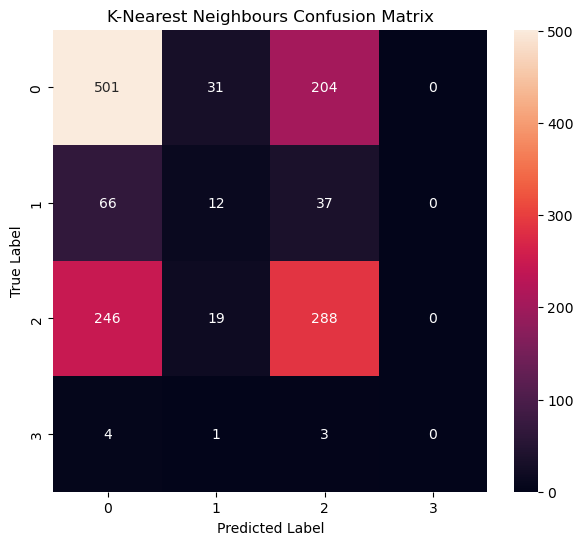

In [390]:
# Generate the confusion matrix for the K-Nearest Neighbours (KNN) classifier
cm_knn = confusion_matrix(y_test, test_preds5)

# Plot heatmap
plt.figure(figsize=(7,6))
sb.heatmap(
    cm_knn,
    annot=True,
    fmt='d',
)

plt.title("K-Nearest Neighbours Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h1> Hyper Parameter Tuning For Random Forest </h1>

In [392]:

# 1) Fit the model on train data
RFT = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=235,
    verbose=2
)
RFT.fit(X_train, y_train)

#predict on train
train_preds8 = RFT.predict(X_train)
#accuracy on train
print("Model accuracy on train is:", accuracy_score (y_train, train_preds8))

#predict on test
test_preds8 = RFT.predict(X_test)
#accuracy on test
print ("Model accuracy onb test is:", accuracy_score(y_test, test_preds8))
print('-'*50)

#We got good accuracy whioch means our model is performing quite well
#ROC
# ROC-AUC (must use probabilities, NOT predicted labels)
train_proba = RFT.predict_proba(X_train)
test_proba  = RFT.predict_proba(X_test)

print("ROC score on train is:",
      roc_auc_score(y_train, train_proba, multi_class="ovr"))
print("ROC score on test is:",
      roc_auc_score(y_test, test_proba, multi_class="ovr"))
print("-"*50)

#Confusion matrix
print ("confusion_matrix train is:", confusion_matrix(y_train, train_preds8))
print ("confusion_matrix test is:", confusion_matrix(y_test, test_preds8))
print ('Wrong predictions out of total')
print ('-' * 50)

#Wrong Prediction made.
print ((y_test !=test_preds8).sum(), '/', ((y_test == test_preds8).sum()+(y_test != test_preds8).sum()))
print ('-'*50)

#Kappa Score
print ('KappaScore is:', metrics.cohen_kappa_score(y_test,test_preds8))
print("-"*50)

# classification report
print("Classification Report (test):")
print(classification_report(y_test, test_preds8))

# F1 score
print("Macro F1:", f1_score(y_test, test_preds8, average="macro"))

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.5s


building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    1.4s


building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


Model accuracy on train is: 0.6987951807228916
Model accuracy onb test is: 0.6055240793201133
--------------------------------------------------


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.0s


ROC score on train is: 0.879109523555882
ROC score on test is: 0.6894392993914277
--------------------------------------------------
confusion_matrix train is: [[2363   24  556    1]
 [ 282   59  120    0]
 [ 671   17 1519    1]
 [  15    0   13    3]]
confusion_matrix test is: [[524  12 199   1]
 [ 70   4  41   0]
 [216   9 327   1]
 [  2   0   6   0]]
Wrong predictions out of total
--------------------------------------------------
557 / 1412
--------------------------------------------------
KappaScore is: 0.2693059519562374
--------------------------------------------------
Classification Report (test):
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       736
           1       0.16      0.03      0.06       115
           2       0.57      0.59      0.58       553
           3       0.00      0.00      0.00         8

    accuracy                           0.61      1412
   macro avg       0.34      0.33      0.33      1412
weigh

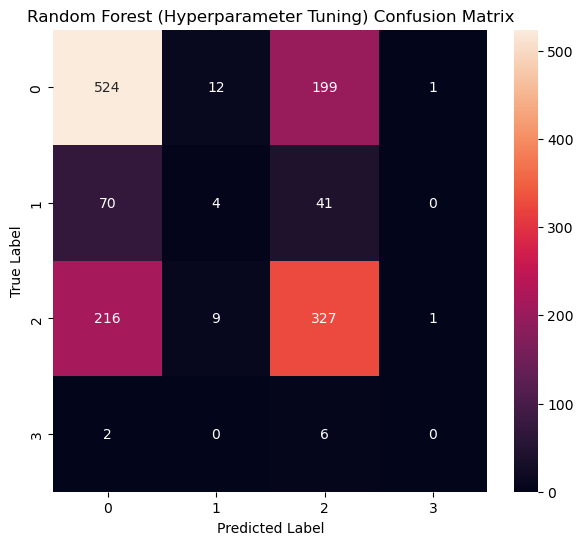

In [318]:
# Generate the confusion matrix for the Random Forest model (after hyperparameter tuning)
cm_rf = confusion_matrix(y_test, test_preds8)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(7,6))
sb.heatmap(cm_rf, annot=True, fmt='d')

plt.title("Random Forest (Hyperparameter Tuning) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h1>RandomSearchCV</h1>

In [79]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=5000, num=10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 2000, 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['entropy', 'gini']
}

print(random_grid)




{'n_estimators': [100, 644, 1188, 1733, 2277, 2822, 3366, 3911, 4455, 5000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [81]:
# Create a base Random Forest model (without fixed hyperparameters)
RFT1 = RandomForestClassifier()

# Set up Randomized Search for hyperparameter tuning
rf_randomcv = RandomizedSearchCV(
    estimator=RFT1,
    param_distributions=random_grid,
    n_iter=20,      
    cv=3,          
    verbose=1,
    random_state=100,
    n_jobs=2        
)

#fit the randomized model
rf_randomcv.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=2,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=100, verbose=1)

In [82]:
# best parameters
rf_randomcv.best_params_




{'n_estimators': 644,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 1336,
 'criterion': 'gini'}

In [83]:
# displaying all parameters
rf_randomcv



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=2,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=100, verbose=1)

In [84]:
# Displaying best parameters from all parameters mentioned above
rf_randomcv.best_estimator_



RandomForestClassifier(max_depth=1336, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=644)

In [85]:
# saving all parameters in best_random_grid
best_random_grid = rf_randomcv.best_estimator_



In [86]:
Y_pred = best_random_grid.predict(X_test)

print(confusion_matrix(y_test, Y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test, Y_pred)))

# Wrong Predictions made.
print((y_test != Y_pred).sum(), '/', ((y_test == Y_pred).sum() + (y_test != Y_pred).sum()))
print("-"*50)

# Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(y_test, Y_pred))

# predicting the randomized search cv model's parameters and evaluating
# the random forest model using evaluation metrics


[[526   5 205   0]
 [ 72   1  42   0]
 [223   3 327   0]
 [  4   0   4   0]]
Accuracy Score 0.6048158640226629
558 / 1412
--------------------------------------------------
KappaScore is:  0.26079887416441894


<h1> Grid Search CV </h1>

In [88]:
# Displays the best set of hyperparameters selected by RandomizedSearchCV
rf_randomcv.best_params_

{'n_estimators': 644,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 1336,
 'criterion': 'gini'}

In [89]:
# Define a refined hyperparameter grid based on the best parameters
# obtained from RandomizedSearchCV for further fine-tuning using GridSearchCV
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200,
                     rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100,
                     rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1336], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [444, 544, 644, 744, 844]}


In [90]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
# Fitting the grid_search to the data

grid_search.best_estimator_
# best parameters of grid search

best_grid = grid_search.best_estimator_
# saving the parameters in best_grid

best_grid
# displaying best_grid

y_pred = best_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print("Accuracy Score {}".format(accuracy_score(y_test, y_pred)))

# Wrong Predictions made.
print((y_test != y_pred).sum() / ( (y_test == y_pred).sum() + (y_test != y_pred).sum() ))

print("-"*50)

# Kappa Score
print("KappaScore is: ", metrics.cohen_kappa_score(y_test, y_pred))
# Predicting the grid search cv on random forest model

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[[536   4 196   0]
 [ 72   1  42   0]
 [241   1 311   0]
 [  4   0   4   0]]
Accuracy Score 0.6005665722379604
0.39943342776203966
--------------------------------------------------
KappaScore is:  0.24831018739198263


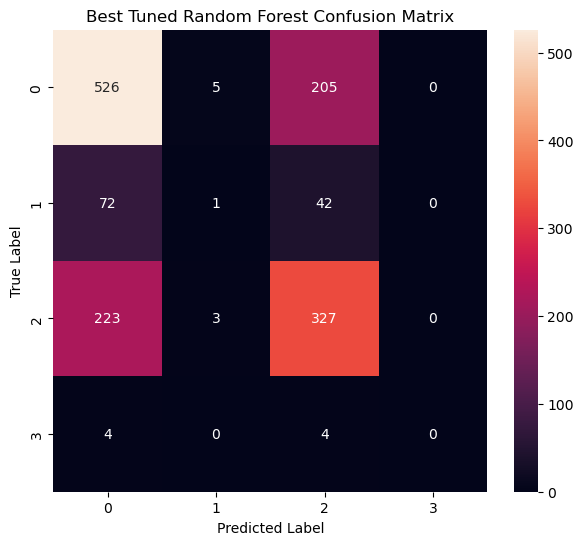

In [162]:
# Retrieve the best Random Forest model obtained after hyperparameter tuning
best_model = rf_randomcv.best_estimator_   
# Make predictions on the test dataset using the tuned model
best_pred  = best_model.predict(X_test)
# Compute the confusion matrix for the tuned Random Forest model
cm_best = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(7,6))
sb.heatmap(cm_best, annot=True, fmt='d')

plt.title("Best Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h1> XG BOOST</h1>

In [394]:
# Initialize the XGBoost classifier with chosen hyperparameters
xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42
)
# Train (fit) the XGBoost model on training data
xgb.fit(X_train, y_train)

# Predict class labels on the test dataset
y_pred = xgb.predict(X_test)


# Calculate and print accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display confusion matrix to analyze class-wise predictions
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print precision, recall, F1-score for each class
print(classification_report(y_test, y_pred))

Accuracy: 0.6005665722379604
Confusion Matrix:
 [[527   9 200   0]
 [ 74   3  38   0]
 [226   9 318   0]
 [  3   0   5   0]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       736
           1       0.14      0.03      0.04       115
           2       0.57      0.58      0.57       553
           3       0.00      0.00      0.00         8

    accuracy                           0.60      1412
   macro avg       0.34      0.33      0.32      1412
weighted avg       0.56      0.60      0.58      1412



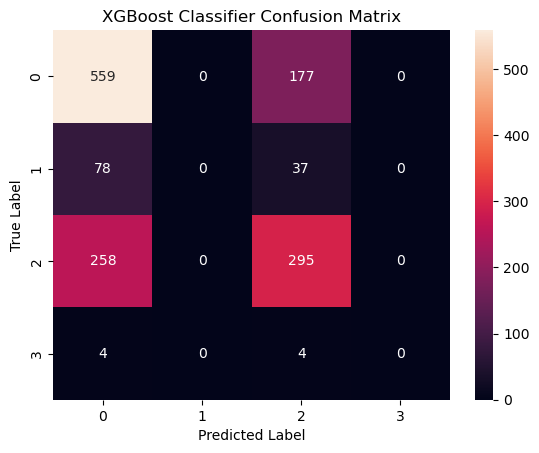

In [136]:
# Generate confusion matrix for XGBoost predictions
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.title("XGBoost Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


<h1> Comparision Analysis </h1>

In [396]:
# KNN
knn_pred = KNN.predict(X_test)

# Decision Tree
dt_pred = DT.predict(X_test)

# Random Forest
rf_pred = best_random_grid.predict(X_test)   # or best_grid.predict(X_test)

# XGBoost
xgb_pred = xgb.predict(X_test)


In [398]:
# Store performance metrics of all models in a dictionary
results = {
    "KNN": {
        "Accuracy": accuracy_score(y_test, knn_pred),
        "Precision": precision_score(y_test, knn_pred, average='weighted'),
        "Recall": recall_score(y_test, knn_pred, average='weighted'),
        "F1-score": f1_score(y_test, knn_pred, average='weighted')
    },

    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, dt_pred),
        "Precision": precision_score(y_test, dt_pred, average='weighted'),
        "Recall": recall_score(y_test, dt_pred, average='weighted'),
        "F1-score": f1_score(y_test, dt_pred, average='weighted')
    },

    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_pred),
        "Precision": precision_score(y_test, rf_pred, average='weighted'),
        "Recall": recall_score(y_test, rf_pred, average='weighted'),
        "F1-score": f1_score(y_test, rf_pred, average='weighted')
    },

    "XGBoost": {
        "Accuracy": accuracy_score(y_test, xgb_pred),
        "Precision": precision_score(y_test, xgb_pred, average='weighted'),
        "Recall": recall_score(y_test, xgb_pred, average='weighted'),
        "F1-score": f1_score(y_test, xgb_pred, average='weighted')
    }
}

# Display results dictionary
results


{'KNN': {'Accuracy': 0.5672804532577904,
  'Precision': 0.5471688642516761,
  'Recall': 0.5672804532577904,
  'F1-score': 0.5552047427622249},
 'Decision Tree': {'Accuracy': 0.6083569405099151,
  'Precision': 0.5759258642078172,
  'Recall': 0.6083569405099151,
  'F1-score': 0.5886084747140767},
 'Random Forest': {'Accuracy': 0.6048158640226629,
  'Precision': 0.5629532129869819,
  'Recall': 0.6048158640226629,
  'F1-score': 0.5790630112171731},
 'XGBoost': {'Accuracy': 0.6005665722379604,
  'Precision': 0.5645959452697487,
  'Recall': 0.6005665722379604,
  'F1-score': 0.5780144517612975}}

In [400]:
# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results).T
# Display the comparison table
results_df


,Accuracy,Precision,Recall,F1-score
KNN,0.567280,0.547169,0.567280,0.555205
Decision Tree,0.608357,0.575926,0.608357,0.588608
Random Forest,0.604816,0.562953,0.604816,0.579063
XGBoost,0.600567,0.564596,0.600567,0.578014


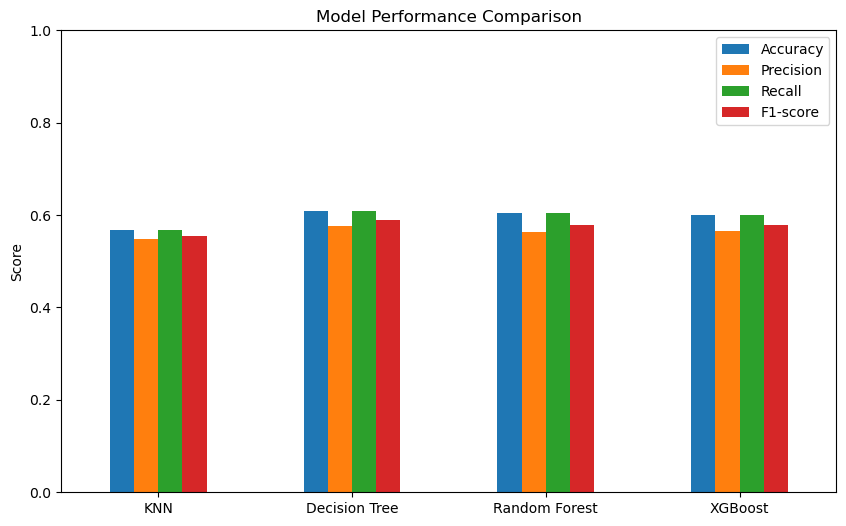

In [402]:
# Plot a bar chart to compare performance of all models
results_df.plot(kind="bar", figsize=(10,6))

# Add title to the plot
plt.title("Model Performance Comparison")

# Label the y-axis
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)   
plt.show()